# Predicting heart disease using machine learning 

This notbook looks into using various Python-based machine learning and data science libraries in an attemot to build a machine leaning model capable of predicting wheather or not someone has heart disease based on their medical attributes.
We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definition
in a statement, 
> Given Clinical parameter about a patient, can we predict whether or not they have heart disease?
## 2. Data 

The original data came from the UCI Heart disease Webssite.
https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> if we can reach 95 % accuracy at predicting wheather or not a patient has a heart disease during the proof of concept, we'll porsue the project 

## 4. Features 

This is where you'll get diffirent information about each of the features in your data 
    
  **Create a data dictionary**
  
 

In [7]:
# Import all the tools we need 

# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want out plots to apear inside the notebook 
%matplotlib inline 

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [9]:
heart_disease_df = pd.read_csv("heart_cleveland_upload.csv")
heart_disease_df.shape

(297, 14)

## exploratory data analysis EDA

The goal is to find out more about the data
1. Quation are we trying to solve?
2. What kind of data do we have and how do we treat diffirent types?
3. what is missing from the data and how do we deal with it ?
4. Where are outliers and why should we care about them?
5. How can you add, change or remove features to get more oiut of your data?

In [10]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


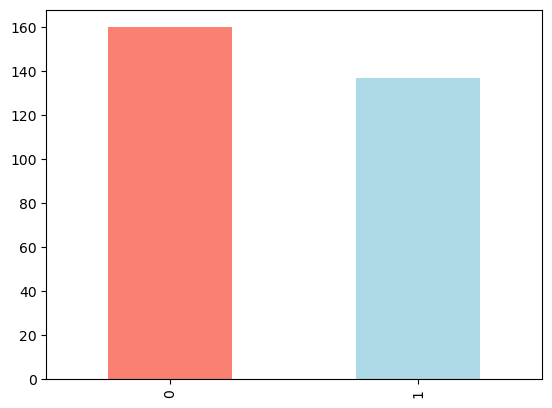

In [20]:
# Checking the target variable using plot 
heart_disease_df["condition"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [15]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [16]:
# are there any missing values
heart_disease_df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [17]:
heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Heart disease Frequancy acourding to Sex 

In [18]:
heart_disease_df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [23]:
# Compare condition column with sex column 
pd.crosstab(heart_disease_df.condition, heart_disease_df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

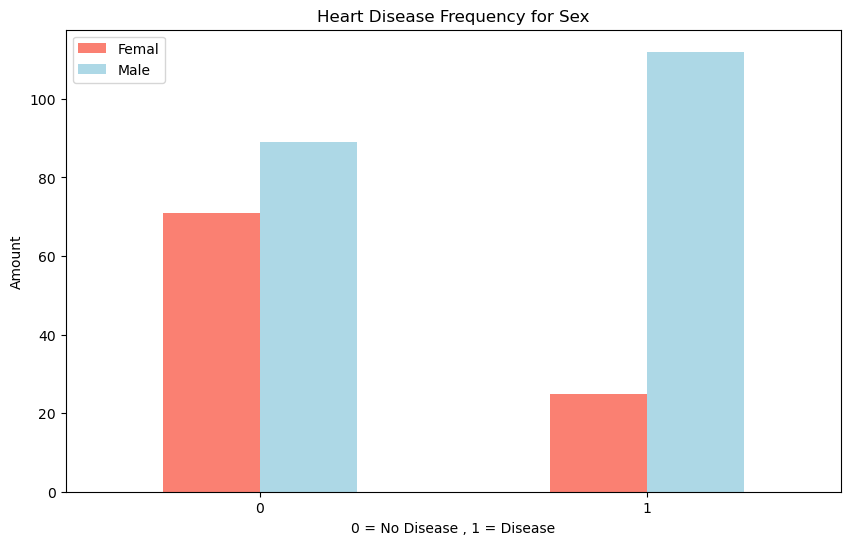

In [26]:
# Create a plot of crosstab
pd.crosstab(heart_disease_df.condition, heart_disease_df.sex).plot(kind = "bar", 
                                                                   figsize = (10, 6), 
                                                                   color = ["salmon", "lightblue"]
                                                                  )
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Femal", "Male"]);
plt.xticks(rotation = 0)

# Age vs. Max Heart Rate for Heart Disease 

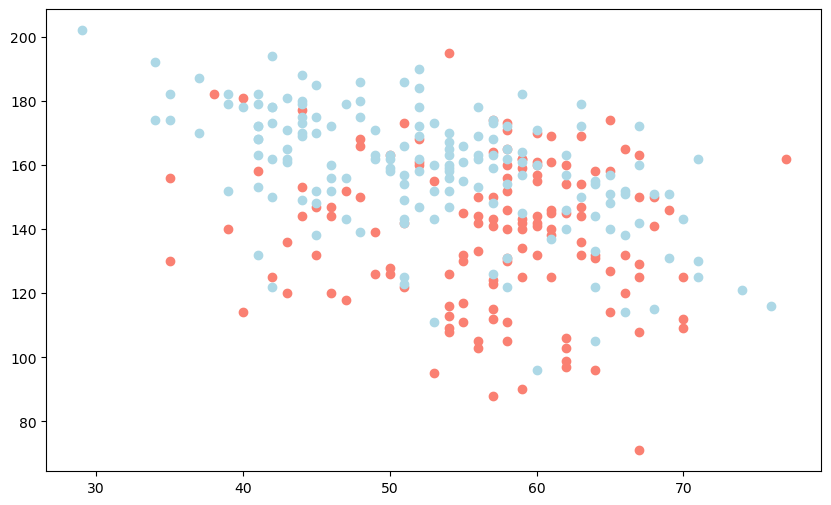

In [32]:
# Create another figure
plt.figure(figsize = (10, 6))

# Scatter with a positive examples
plt.scatter(heart_disease_df.age[heart_disease_df.condition ==1],
            heart_disease_df.thalach[heart_disease_df.condition ==1],
            c ="salmon"
           )

#Scatter with negative example 
plt.scatter(heart_disease_df.age[heart_disease_df.condition ==0],
            heart_disease_df.thalach[heart_disease_df.condition ==0],
            c ="lightblue"
           )


<Axes: ylabel='Frequency'>

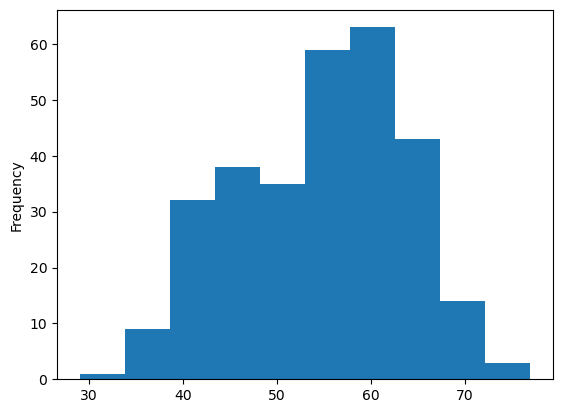

In [33]:
# Check the distribution of the age column with a histogram
heart_disease_df.age.plot.hist()

### Heart Disease for frequency per Chest pain Type


In [34]:
pd.crosstab(heart_disease_df.cp, heart_disease_df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

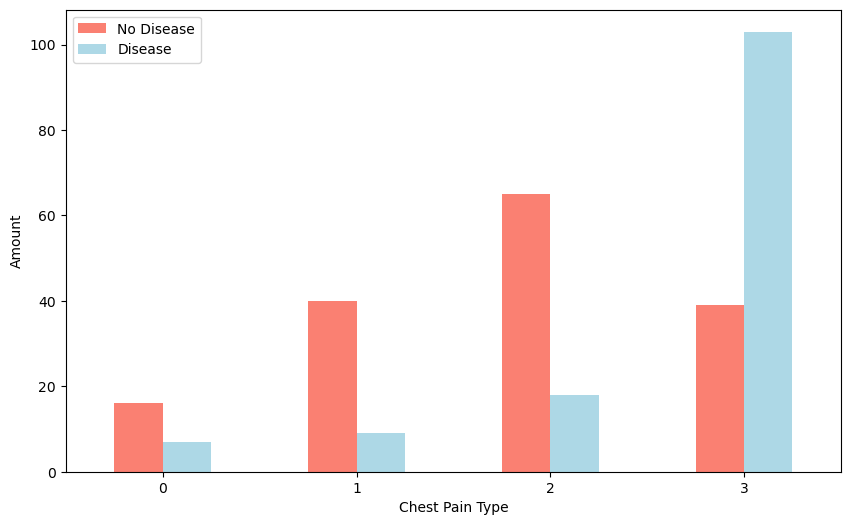

In [36]:
# Make the crosstab more visual
pd.crosstab(heart_disease_df.cp, heart_disease_df.condition).plot(kind = "bar",
                                                    figsize = (10, 6),
                                                    color = ["salmon", "lightblue"])

# Add some communication
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0)